In [ ]:
import numpy as np
import pandas as pd

rg = np.random.default_rng()

def generate_data(n_features, n_values):
    features = rg.random((n_features, n_values))
    weights = rg.random((1, n_values))[0]
    targets = np.random.choice([0,1], n_features)
    data = pd.DataFrame(features, columns=["x0", "x1", "x2"])
    data["targets"] = targets
    return data, weights

data, weights = generate_data(4,3)
print(data)

         x0        x1        x2  targets
0  0.509733  0.503297  0.438457        1
1  0.865619  0.384890  0.389905        0
2  0.132446  0.077865  0.264340        1
3  0.902757  0.008194  0.527265        0


In [ ]:
bias = 0.5
l_rate = 0.1
epochs = 50
epoch_loss = []

def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias

def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

def cross_entropy(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

def update_weights(weights, l_rate, target, prediction, feature):
    new_weights = []
    for x, w in zip(feature, weights):
        new_w = w + l_rate*(target-prediction)*x
        new_weights.append(new_w)
    return new_weights

def update_bias(bias, l_rate, target, prediction):
    return bias + l_rate*(target-prediction)

def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target = data.loc[i][-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)
            # gradient descent
            weights = update_weights(weights, l_rate, target, prediction, feature)
            bias = update_bias(bias, l_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
        print("**************************")
        print("epoch", e)
        print(average_loss)
train_model(data, weights, bias, l_rate, epochs)

**************************
epoch 0
0.41180051422398156
**************************
epoch 1
0.3839416962564211
**************************
epoch 2
0.36178405942504843
**************************
epoch 3
0.34437784114445025
**************************
epoch 4
0.33077294943366364
**************************
epoch 5
0.3201121900860858
**************************
epoch 6
0.31167653023726705
**************************
epoch 7
0.30489335506106496
**************************
epoch 8
0.299323137533108
**************************
epoch 9
0.294637106820773
**************************
epoch 10
0.29059369975062643
**************************
epoch 11
0.28701758848315884
**************************
epoch 12
0.2837825679337642
**************************
epoch 13
0.28079829300901
**************************
epoch 14
0.27800032343810804
**************************
epoch 15
0.2753428025060012
**************************
epoch 16
0.2727931433257174
**************************
epoch 17
0.2703282048404769
***************

<Axes: >

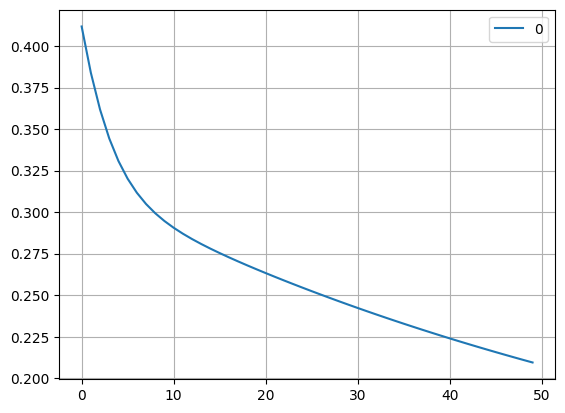

In [ ]:
df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind="line", grid=True)
df_plot